In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl 

In [4]:
cocacola= pd.read_excel('CocaCola_Sales_Rawdata.xlsx',sheet_name='Sheet1')
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [6]:
cocacola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [7]:
cocacola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


<AxesSubplot:>

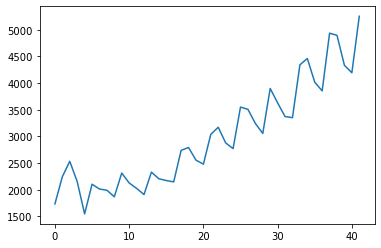

In [8]:
cocacola.Sales.plot()

In [9]:
cocacola['Quarters']= 0
cocacola['Year'] = 0
for i in range(42):
    p = cocacola["Quarter"][i]
    cocacola['Quarters'][i]= p[0:2]
    cocacola['Year'][i]= p[3:5]

<ipython-input-9-5a8792f18232>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cocacola['Quarters'][i]= p[0:2]
C:\Users\sanjana\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-9-5a8792f18232>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cocacola['Year'][i]= p[3:5]


In [10]:
# Prepring dummies 
Quarters_Dummies = pd.DataFrame(pd.get_dummies(cocacola['Quarters']))
cocacola1 = pd.concat([cocacola,Quarters_Dummies],axis = 1)

In [11]:
cocacola1["t"]=np.arange(1,43)

In [12]:
cocacola1["t_squared"] = cocacola1["t"]*cocacola1["t"]
cocacola1.columns

Index(['Quarter', 'Sales', 'Quarters', 'Year', 'Q1', 'Q2', 'Q3', 'Q4', 't',
       't_squared'],
      dtype='object')

In [13]:
cocacola1["Log_Sales"]=np.log(cocacola1["Sales"])

In [14]:
cocacola1.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,Log_Sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


<AxesSubplot:xlabel='Quarters', ylabel='Year'>

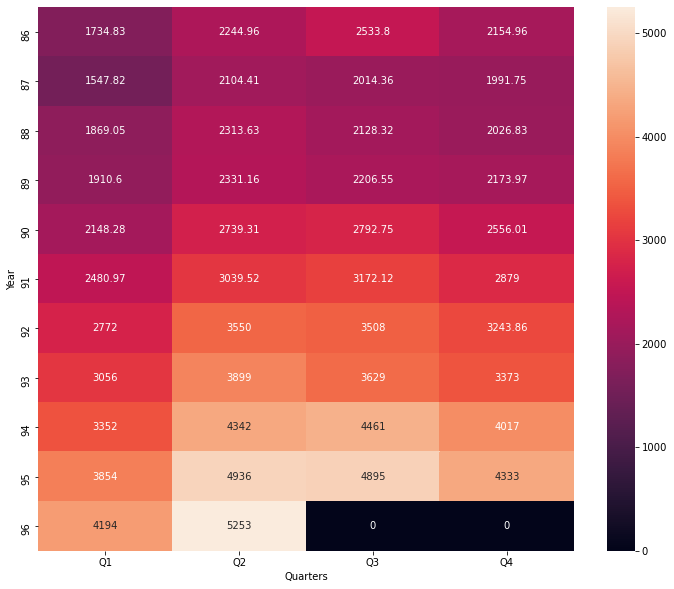

In [15]:
# visualize the data

plt.figure(figsize=(12,10))
plot_month_y = pd.pivot_table(data = cocacola,values="Sales",index="Year",columns="Quarters"
                             ,aggfunc="mean",fill_value=0)
sns.heatmap(plot_month_y,annot=True,fmt = "g")

In [16]:
#

<AxesSubplot:xlabel='Quarters', ylabel='Sales'>

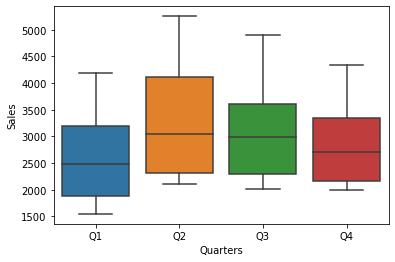

In [17]:
sns.boxplot(x="Quarters",y="Sales",data=cocacola1)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

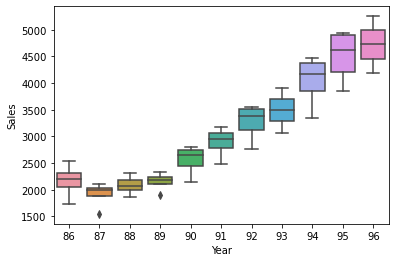

In [18]:
sns.boxplot(x="Year",y="Sales",data=cocacola1)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

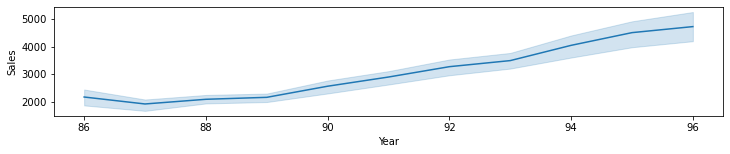

In [19]:
plt.figure(figsize=(12,2))
sns.lineplot(x='Year',y='Sales',data=cocacola)

# Splitting data

In [20]:
Train = cocacola1.head(38)
Test = cocacola1.tail(4)

In [21]:
# Linear model
import statsmodels.formula.api as smf
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

591.553295722396

In [22]:
# Exponential
Exp = smf.ols('Log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

466.2479731067161

In [23]:
# Quadratic
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

475.5618351831504

In [24]:
# Additive seasonality
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1860.0238154547274

In [25]:
# Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

301.7380071934905

In [26]:
# Multiplicative Seasonality
Mul_sea = smf.ols('Log_Sales~Q1+Q2+Q3',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1963.3896400779743

In [27]:
# Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('Log_Sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

225.52439049817832

In [28]:
#tabulating the rmse values

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,591.553296
1,rmse_Exp,466.247973
2,rmse_Quad,475.561835
3,rmse_add_sea,1860.023815
4,rmse_add_sea_quad,301.738007
5,rmse_Mult_sea,1963.389640
6,rmse_Mult_add_sea,225.524390


Model built with multiplicative seasonality and addicitve trend has less RMSE compared to all others and hence we would use that model for forecasting new data

# PREDICT WITH NEW DATA

In [29]:
t = np.arange(43,54)
t

array([43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53])

In [30]:
t_squared=np.array(t*t)
t_squared

array([1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809])

In [31]:
df={'t':t,'t_squared':t_squared}
df=pd.DataFrame(df)

In [32]:
Quarter = pd.DataFrame({'Quarter':['Q3_96','Q4_96','Q1_97','Q2_97','Q3_97','Q4_97','Q1_98','Q2_98','Q3_98','Q4_98','Q1_99']})

In [33]:
newdata = pd.concat([Quarter,df],axis=1)
newdata

,Quarter,t,t_squared
0,Q3_96,43,1849
1,Q4_96,44,1936
2,Q1_97,45,2025
3,Q2_97,46,2116
4,Q3_97,47,2209
5,Q4_97,48,2304
6,Q1_98,49,2401
7,Q2_98,50,2500
8,Q3_98,51,2601
9,Q4_98,52,2704


In [34]:
model_full= smf.ols('Sales~t',data = cocacola1).fit()
pred_new=pd.Series(model_full.predict(newdata))
pred_new

0     4569.833196
1     4643.111331
2     4716.389465
3     4789.667600
4     4862.945734
5     4936.223868
6     5009.502003
7     5082.780137
8     5156.058271
9     5229.336406
10    5302.614540
dtype: float64

In [39]:
newdata["forecasted_Sales"] = pd.Series(pred_new)
newdata

,Quarter,t,t_squared,forecasted_Sales
0,Q3_96,43,1849,4569.833196
1,Q4_96,44,1936,4643.111331
2,Q1_97,45,2025,4716.389465
3,Q2_97,46,2116,4789.667600
4,Q3_97,47,2209,4862.945734
5,Q4_97,48,2304,4936.223868
6,Q1_98,49,2401,5009.502003
7,Q2_98,50,2500,5082.780137
8,Q3_98,51,2601,5156.058271
9,Q4_98,52,2704,5229.336406


In [40]:
#225.52439049818733  
# multiplicative additive seasonality is best model

# FORECASTING DATA DRIVEN MODELS

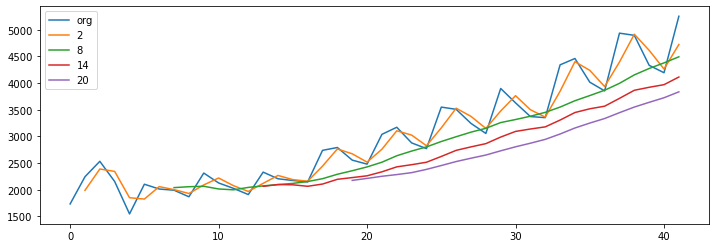

In [41]:
plt.figure(figsize=(12,4))
cocacola.Sales.plot(label="org")
for i in range(2,24,6):
    cocacola['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

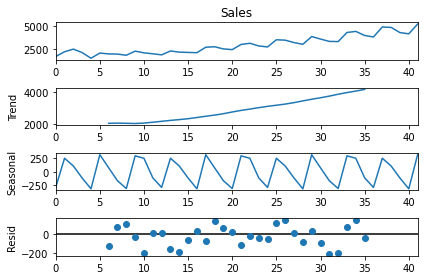

In [43]:
decompose_ts_add = seasonal_decompose(cocacola['Sales'],period=12)
decompose_ts_add.plot()
plt.show()

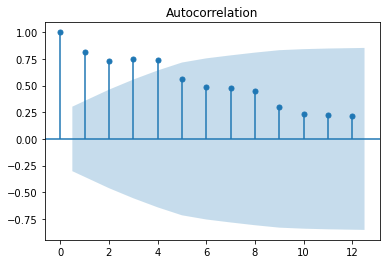

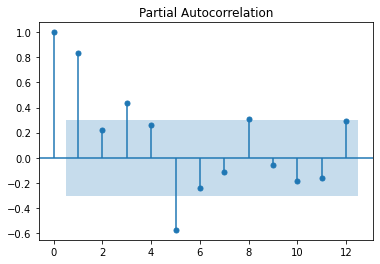

In [44]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cocacola.Sales,lags=12)
tsa_plots.plot_pacf(cocacola.Sales,lags=12)
plt.show()


# Evaluation Metric MAPE

In [45]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method

In [46]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

C:\Users\sanjana\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


13.169736766030951

# Holt method

In [47]:
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

<ipython-input-47-bd0ef4e2b52c>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


12.361934138460628

In [48]:
# Holt method without passing hyperparameters
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

10.506483142573769

# Holts winter exponential smoothing with additive seasonality and additive trend

In [49]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 

5.6187173824510435

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [50]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

2.851410922784237

Model built with Holts winter exponential smoothing with multiplicative seasonality and additive trend has less MAPE compared to all others and hence we would use that model for forecasting new data

# Build the model on entire dataset

In [53]:
hwe_model_add_add = ExponentialSmoothing(cocacola1["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [55]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

42    4929.498608
43    4614.623753
44    4554.130175
45    5773.661620
46    5819.106671
47    5235.769937
48    4978.866235
49    6256.435076
50    6148.798793
51    5598.154172
dtype: float64